Universidade do Vale do Itajaí<br>
Escola Politécnica<br>
Processamento Digital de Sinais: Imagens

# Prática com Operações Pontuais e OpenCV

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Conversão de imagem RGB em imagem Grayscale

In [3]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow


In [2]:
#abria a imagem
img = cv2.imread('data/t1.jpg',1)
#cv2_imshow(img)

In [3]:
#mostrando a imagem colorida
cv2.imshow('in', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
img_grayscale_basic_np = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2]) / 3

#cv2
B, G, R = cv2.split(img)
img_grayscale_basic_cv2 = (R + G + B) / 3

img_grayscale_basic = np.array(img_grayscale_basic_cv2, dtype=np.uint8)

#No PC usar a seguinte forma de plotagem, para o Colab usar cv2_imshow(img)
cv2.imshow('img_grayscale_basic', img_grayscale_basic)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
# Coeficientes de ponderação para conversão ponderada
wR = 0.299
wG = 0.587
wB = 0.114

# Aplicando conversão ponderada usando NumPy
img_grayscale_pondered_np = wR * img[:, :, 2] + wG * img[:, :, 1] + wB * img[:, :, 0]

# Converte para uint8 (escala de cinza)
img_grayscale_pondered_np = img_grayscale_pondered_np.astype(np.uint8)

# No PC, use a seguinte forma de plotagem
cv2.imshow('img_grayscale_pondered_np', img_grayscale_pondered_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Aplicando conversão ponderada usando OpenCV
img_grayscale_pondered_cv2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# No PC, use a seguinte forma de plotagem
cv2.imshow('img_grayscale_pondered_cv2', img_grayscale_pondered_cv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Histograma de uma imagem

Fazer o histograma de uma imagem

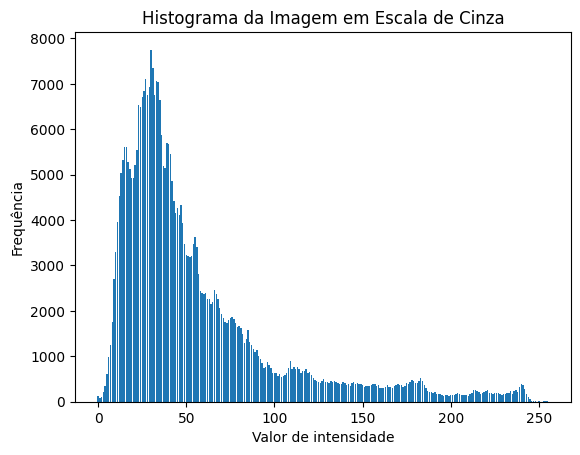

In [16]:
histogram = np.zeros(256)

# Percorra os pixels da imagem e conte as ocorrências de cada valor de intensidade
for pixel_value in img.ravel():
    histogram[pixel_value] += 1

# Plote o histograma
plt.bar(range(256), histogram)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequência')
plt.title('Histograma da Imagem em Escala de Cinza')
plt.show()


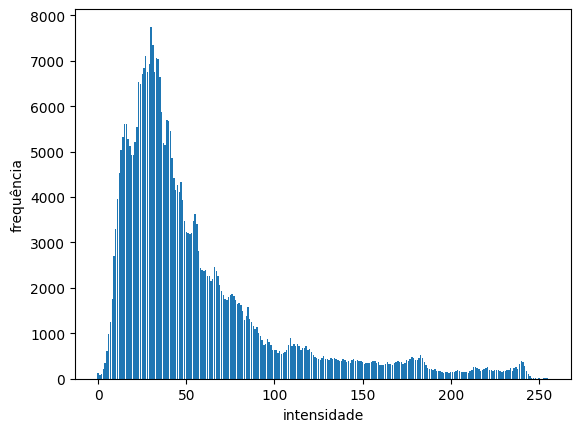

In [19]:
x = np.linspace(0, 255, 256)
plt.bar(x, histogram)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

Agora faça o histograma normalizado

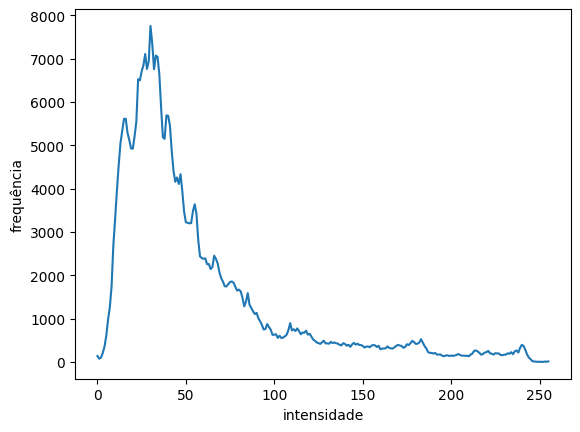

In [20]:
total_pixels = img.size
histogram_normalized = histogram / total_pixels

x = np.linspace(0, 255, 256)
plt.plot(x, histogram)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

## Transformações

Aplicar o conceito de transformação negativa em uma imagem. Cuide da questão de haver 3 bandas.

In [4]:
#negativo

# Carregue a imagem colorida
img_in = cv2.imread('data/t1.jpg')

# Crie uma cópia da imagem de entrada para a saída
img_out = img_in.copy()

img_out[:, :, 0] = 255 - img_in[:, :, 0]  # Banda Azul
img_out[:, :, 1] = 255 - img_in[:, :, 1]  # Banda Verde
img_out[:, :, 2] = 255 - img_in[:, :, 2]  # Banda Vermelha

img_out = img_out.astype(np.uint8)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação logaritimica em uma imagem. Cuide da questão de haver 3 bandas.

In [6]:
#logaritimica 
img_in = cv2.imread('data/t1.jpg')

c = 255 / np.log(1 + np.max(img_in))
log_image = c * (np.log(img_in + 1))

img_out = np.array(log_image, dtype = np.uint8)


print(img_out.max())
cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\Pedaço\AppData\Local\Temp\ipykernel_35928\2062315381.py:5: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(img_in + 1))
C:\Users\Pedaço\AppData\Local\Temp\ipykernel_35928\2062315381.py:7: RuntimeWarning: invalid value encountered in cast
  img_out = np.array(log_image, dtype = np.uint8)


255


Aplicar o conceito de transformação de gamma em uma imagem. Cuide da questão de haver 3 bandas.

In [8]:
#gamma 
img_in = cv2.imread('data/t1.jpg')


gamma = 2.2

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)

img_out = gammaCorrection(img_in, gamma)

print(img_out.max())
cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

255


Aplicar o conceito de transformação de alargamento de contraste em uma imagem. Cuide da questão de haver 3 bandas.

In [22]:
#alargamento de contraste
img_in = cv2.imread('data/t1.jpg')
alpha = 0.5 # Simple contrast control
beta = 0 # Simple brightness control
for y in range(img_in.shape[0]):
 for x in range(img_in.shape[1]):
    for c in range(img_in.shape[2]):
        img_out[y,x,c] = np.clip(alpha*img_in[y,x,c] + beta, 0, 255)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação de contraste e brilho em uma imagem. Cuide da questão de haver 3 bandas.

In [11]:
#contraste e brilho
img_in = cv2.imread('data/t1.jpg')
a = 1.5 # Contrast control
b = 10 # Brightness control

img_out = cv2.convertScaleAbs(img_in, alpha=a, beta=b)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação de limiar em uma imagem. Cuide da questão de haver 3 bandas.

In [24]:
#limiar
img_in = cv2.imread('data/t1.jpg')

limiar_r = 150  # Limiar para o canal vermelho
limiar_g = 100  # Limiar para o canal verde
limiar_b = 50   # Limiar para o canal azul

img_out = cv2.inRange(img_in, (limiar_b, limiar_g, limiar_r), (255, 255, 255))

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação de limiar com fatiamento de plano em uma imagem. Cuide da questão de haver 3 bandas.

In [26]:
#limiar (com fatiamento por plano)
img_in = cv2.imread('data/t1.jpg')

# Definindo os limiares para cada banda (canal de cor)
limiar_r = 150  # Limiar para o canal vermelho
limiar_g = 100  # Limiar para o canal verde
limiar_b = 50   # Limiar para o canal azul

# Criando máscaras de limiar para cada banda
mask_r = (img_in[:, :, 2] > limiar_r).astype(np.uint8) * 255  # Canal vermelho
mask_g = (img_in[:, :, 1] > limiar_g).astype(np.uint8) * 255  # Canal verde
mask_b = (img_in[:, :, 0] > limiar_b).astype(np.uint8) * 255  # Canal azul

# Combinando as máscaras para criar a imagem de saída
img_out = cv2.merge((mask_b, mask_g, mask_r))

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()